### 2022-1 Artificial Intelligence (01)
## Homework #1: MLP from the scratch
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

Ewha Womans University

In [1]:
import numpy as np

In [2]:
# Sigmoid function
def sigmoid(x):
  # Problem 1.(a): fill here
  return 1 / (1+np.exp(-1*x))

# Derivative of sigmoid function
def dsigmoid(x):
  # Problem 1.(a): fill here
  return sigmoid(x)*(1-sigmoid(x))

# Hyperbolic tangent function
def tanh(x):
  # Problem 1.(a): fill here
  return np.tanh(x)

# Derivative of hyperbolic tangent function
def dtanh(x):
  # Problem 1.(a): fill here
  return 1-(tanh(x))**2

In [3]:
# Mean squared error function
def MSE(O, T):
  # Problem 1.(b): fill here
  return np.square(np.subtract(O.T,T)).mean()
# Derivative of hyperbolic tangent function
def dMSE(O, T):
  # Problem 1.(b): fill here
  return (O-T)

In [6]:
class MLP:

  def __init__(self, learning_rate=0.01, n_epochs=5, n_inputs=2, n_hiddens=2, n_outputs=1):
    self.lr = learning_rate
    self.n_epochs = n_epochs
    
    self.n_inputs = n_inputs
    self.n_hiddens = n_hiddens
    self.n_outputs = n_outputs

    self.first_layer_activation_func = tanh
    self.first_layer_dactivation_func = dtanh
    self.second_layer_activation_func = sigmoid
    self.second_layer_dactivation_func = dsigmoid
    self.loss_func = MSE
    self.dloss_func = dMSE
    self.first_layer_weights = None
    self.first_layer_bias = None
    self.second_layer_weights = None
    self.second_layer_bias = None

  def _init_params(self):
    # Problem 1.(c): fill here
    np.random.seed(42)
    self.first_layer_weights = np.random.random((self.n_inputs,self.n_hiddens))
    self.first_layer_bias = np.random.random((self.n_hiddens))
    self.second_layer_weights = np.random.random((self.n_hiddens))
    self.second_layer_bias = np.random.random(self.n_outputs)
    

  def _forward(self, X, T):
    A1 = np.zeros(shape=(4,2))
    Z1 = np.zeros(shape=(4,2))
    A2 = np.zeros(shape=(4,1))
    Z2 = np.zeros(shape=(4,1))

    # Problem 1.(d): fill here
    for idx, sample in enumerate(X):
      Z1[idx] = np.array([(np.dot(self.first_layer_weights[0],sample) + self.first_layer_bias[0]),(np.dot(self.first_layer_weights[1], sample)+self.first_layer_bias[1])])
      A1[idx] = self.first_layer_activation_func(Z1[idx])
      Z2[idx] = np.dot(self.second_layer_weights ,A1[idx]) + self.second_layer_bias
      A2[idx] = self.second_layer_activation_func(Z2[idx])
      
    if(T is not None ):
      loss = self.loss_func(A2, T)
      return Z1, A1, Z2, A2, loss  
    return A2

  def _backward(self, X, Z1, A1, Z2, A2, T):
    # Problem 1.(e): fill here

    dW1 = np.zeros(shape=(8,2))
    dB1 = np.zeros(shape=(4,2))
    dW2 = np.zeros(shape=(4,2))
    dB2 = np.zeros(shape=(4,1))
    for idx, sample in enumerate(X):
      error2 = self.first_layer_dactivation_func(Z2[idx]) * self.dloss_func(A2[idx], T[idx])
      dW2[idx] = error2 * A1[idx]
      error1 = self.second_layer_weights * error2 * self.second_layer_dactivation_func(Z1[idx])
      dW1[2*idx] = error1[0] * sample
      dW1[2*idx+1] = error1[1] * sample
      dB2[idx] = error2
      dB1[idx] = error1

    return dW1, dB1, dW2, dB2
  def predict(self, X):
    return self._forward(X, None)
    
  def fit(self, X, T):
    
    self._init_params()
    loss_trace = []

    for _ in range(self.n_epochs):
      Z1, A1, Z2, A2, loss = self._forward(X, T)
      dW1, dB1, dW2, dB2 = self._backward(X, Z1, A1, Z2, A2, T)

      #Problem 1.(f): fill here
      for idx, sample in enumerate(X):
        self.first_layer_weights[0] -= self.lr*dW1[2*idx]
        self.first_layer_weights[1] -= self.lr*dW1[2*idx+1]
        
        self.first_layer_bias -= self.lr*dB1[idx]
        self.second_layer_weights -= self.lr*dW2[idx]
        self.second_layer_bias-= self.lr*dB2[idx]
      loss_trace.append(loss)

    return loss_trace

In [7]:
# Problem 1.(g): fill here
n_epochs=10000
mlp = MLP(learning_rate=0.1, n_epochs=n_epochs, n_inputs=2, n_hiddens=2, n_outputs=1)
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([0.0, 1.0, 1.0, 0.0])
loss_trace = mlp.fit(X, T)

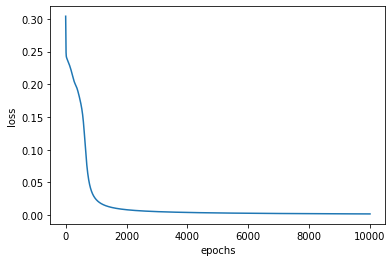

In [8]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [9]:
# Print out XOR outputs for an input matrix X
print(mlp.predict(X))

[[0.0410828 ]
 [0.95744182]
 [0.95744554]
 [0.05207512]]
